#Linear regression using Ordinary Least square (OLS) method

#import libraries

In [1]:
import pandas as pd
import numpy as np

split data and cross-validation

In [2]:
from sklearn.model_selection import train_test_split, KFold,cross_val_score

OLS library for linear regression

In [3]:
import statsmodels.api as sm

visualisation

In [4]:
import pylab
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from sklearn.metrics import mean_squared_error

In [6]:
import scipy.stats as stats 

VIF(variabel Infliation factor)(so called corealtion score)

In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

feature selection for regression

In [8]:
from sklearn.feature_selection import f_regression

read the dataset

In [10]:
path="F:\DATA SCIENCE\python\py\ALGORITHMS\Linear Regression using Python\Protien contetn prediction\prot.csv"
prot=pd.read_csv(path)

In [11]:
prot.head(3)

,Unnamed: 0,tot_surf_area,npe_area,fa_enpr,RMSD,fa_enppr,molmass_ea,avg_dev,euc_dist,ssp,sdc,X,X.1,s,t,u
0,1,18775.10,5379.74,0.28653,2.555,253.3780,2543981.045,316.588,5729.45,0,21.4332,NaN,NaN,NaN,NaN,NaN
1,2,6577.95,2216.25,0.33692,10.330,61.6351,869891.523,105.043,2815.13,0,40.6875,NaN,NaN,NaN,NaN,NaN
2,3,21164.30,7060.92,0.33362,3.713,254.7890,2961050.576,330.066,5545.96,0,23.4201,NaN,NaN,NaN,NaN,NaN


to change the display settings (to get full view)

In [ ]:
pd.set_option('display.expand_frame_repr',False)

remove the unwanted columns

In [12]:
prot = prot.drop(['Unnamed: 0','X','X.1','s','t','u'],axis=1)
prot.columns

Index(['tot_surf_area', 'npe_area', 'fa_enpr', 'RMSD', 'fa_enppr',
       'molmass_ea', 'avg_dev', 'euc_dist', 'ssp', 'sdc'],
      dtype='object')

dimension (R,C)

In [15]:
prot.shape
prot.shape[0] # total rows
prot.shape[1] # total columns

10

head/tail

In [17]:
prot.head(2)
prot.tail(2)

,tot_surf_area,npe_area,fa_enpr,RMSD,fa_enppr,molmass_ea,avg_dev,euc_dist,ssp,sdc
15218,9452.72,2370.81,0.25080,1.840,100.952,1332037.0,142.940,3935.91,0,33.4059
15219,9211.97,2877.44,0.31235,2.558,106.619,1280889.0,129.175,3885.18,0,33.9044


data summary

In [18]:
prot.describe()

,tot_surf_area,npe_area,fa_enpr,RMSD,fa_enppr,molmass_ea,avg_dev,euc_dist,ssp,sdc
count,15220.000000,15192.000000,15220.000000,15220.000000,15220.000000,1.522000e+04,15220.000000,15220.000000,15220.0,15220.000000
mean,9828.036643,3002.560134,0.301851,7.763073,103.202423,1.363997e+06,145.003757,3970.738154,0.0,34.540985
std,4084.711709,1464.159034,0.062786,6.120841,55.652543,5.655366e+05,70.050058,1738.141666,0.0,5.976616
min,0.000000,510.530000,0.102600,0.000000,10.310100,3.743155e+05,32.865300,1107.130000,0.0,15.746700
25%,6895.102500,1974.707500,0.258145,2.306000,63.550925,9.512150e+05,94.482100,3168.862500,0.0,30.471975
50%,8841.975000,2653.765000,0.299545,5.026500,86.922200,1.230739e+06,124.908000,3821.885000,0.0,35.355650
75%,12060.850000,3749.602500,0.342545,13.428500,132.978250,1.683800e+06,180.563000,4635.200000,0.0,38.863825
max,40034.900000,15312.000000,0.569740,20.999000,369.317000,5.472011e+06,598.408000,73461.200000,0.0,54.755100


from summary, we see column 'ssp' has all the measures as 0. so we can remove it from the dataset

In [19]:
prot = prot.drop('ssp',axis=1)

check for NULLs

#EXploratory Data Analysis and imputation

In [20]:
prot.isnull().sum()

tot_surf_area     0
npe_area         28
fa_enpr           0
RMSD              0
fa_enppr          0
molmass_ea        0
avg_dev           0
euc_dist          0
sdc               0
dtype: int64

In [ ]:
#print(prot)#so we take a null indexes and subsequnt column for refrence

In [21]:
prot[['tot_surf_area','npe_area']][prot.npe_area.isnull()]

,tot_surf_area,npe_area
515,12412.90,NaN
540,8434.65,NaN
1510,8450.04,NaN
1784,7764.46,NaN
2275,8035.16,NaN
2424,10066.10,NaN
2650,8557.14,NaN
3009,9244.16,NaN
3635,8040.40,NaN
4421,10030.30,NaN


impute 'npe_area' as tot_surf_area/3 where npe_area = NULL

In [23]:
ndx = prot.npe_area[prot.npe_area.isnull()].index

In [24]:
prot.npe_area[prot.npe_area.isnull()] = prot.tot_surf_area/3

verify the changes and check for Nulls again

In [25]:
prot[['tot_surf_area','npe_area']][prot.index.isin(ndx)] 
prot.isnull().sum()

tot_surf_area    0
npe_area         0
fa_enpr          0
RMSD             0
fa_enppr         0
molmass_ea       0
avg_dev          0
euc_dist         0
sdc              0
dtype: int64

In [26]:
prot.dtypes

tot_surf_area    float64
npe_area         float64
fa_enpr          float64
RMSD             float64
fa_enppr         float64
molmass_ea       float64
avg_dev          float64
euc_dist         float64
sdc              float64
dtype: object

check for 0

In [27]:
prot[prot==0].count()

tot_surf_area    20
npe_area          0
fa_enpr           0
RMSD             90
fa_enppr          0
molmass_ea        0
avg_dev           0
euc_dist          0
sdc               0
dtype: int64

impute 'tot_surf_area' = npe_area * 3 where tot_surf_area = 0

In [ ]:
#we got 20 zero counts in total surfacea area column

#Imputation is done by refrencing the columns and multiply it by 3

In [29]:
prot[['tot_surf_area','npe_area']][prot.tot_surf_area==0]
ndx=prot[['tot_surf_area','npe_area']][prot.tot_surf_area==0].index

update

In [30]:
prot.tot_surf_area[prot.tot_surf_area==0] = prot.npe_area*3

verify the change

In [31]:
prot[['tot_surf_area','npe_area']][prot.index.isin(ndx)]

,tot_surf_area,npe_area
347,6937.38,2312.46
608,8955.96,2985.32
1121,8118.93,2706.31
2166,10743.51,3581.17
3192,5824.02,1941.34
3830,9635.13,3211.71
5418,10983.48,3661.16
5979,8289.24,2763.08
6720,10119.09,3373.03
9223,5733.27,1911.09


check for 0

In [32]:
prot[prot==0].count()

tot_surf_area     0
npe_area          0
fa_enpr           0
RMSD             90
fa_enppr          0
molmass_ea        0
avg_dev           0
euc_dist          0
sdc               0
dtype: int64

In [ ]:
#NOw imputtation of RMSD where zero count is 90
#to impute it we drop that rows records

In [33]:
prot[['RMSD','fa_enppr']][prot.RMSD > 0].head(50).sort_values('RMSD')

,RMSD,fa_enppr
13,0.505,48.0677
42,0.545,47.8040
39,1.631,179.7940
10,1.657,71.9063
17,1.658,35.0303
20,1.754,88.5083
12,1.821,71.3453
35,1.834,223.8060
29,2.100,75.8983
43,2.262,123.7660


since the Y-var has 0, drop these records

In [34]:
ndx = prot[prot.RMSD==0].index
len(ndx)

90

In [35]:
print("before dropping rows, shape = ", prot.shape)
prot = prot.drop(ndx,axis=0)
print("after dropping rows, shape = ", prot.shape)

before dropping rows, shape =  (15220, 9)
after dropping rows, shape =  (15130, 9)


In [36]:
prot[prot==0].count()

tot_surf_area    0
npe_area         0
fa_enpr          0
RMSD             0
fa_enppr         0
molmass_ea       0
avg_dev          0
euc_dist         0
sdc              0
dtype: int64

check the distibution and outliers of features

In [38]:
cols = list(prot.columns)
cols.remove('RMSD')

In [39]:
len(cols)

8

outliers

In [ ]:
#OUTLEIRS Imputaion 

<AxesSubplot:>

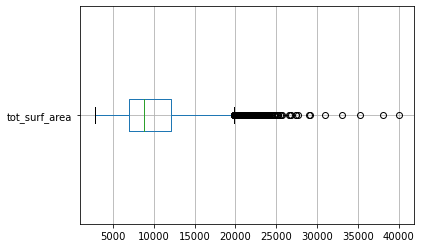

In [40]:
prot.boxplot('tot_surf_area',vert=False)

#Visualization 
#1)Boxplot
#2)Distplot (density plot to get distribution of data)

In [41]:
nrow=4; ncol=2; npos=1

whis=<n> indicates the IQR formula. can override the default 1.5 to any value to suppress the outliers from appearing on the boxplot

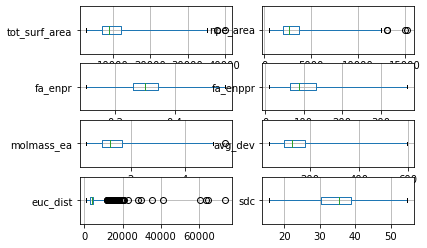

In [42]:
fig = plt.figure()
for c in cols:
    fig.add_subplot(nrow,ncol,npos)
    prot.boxplot(c,vert=False,whis=5)
    npos+=1

check distribution

E:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

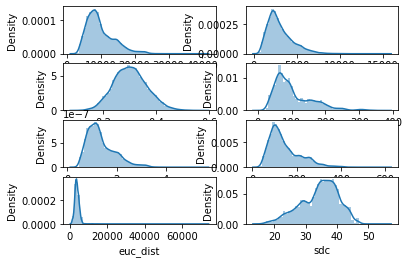

In [43]:
nrow=4; ncol=2; npos=1
fig=plt.figure()
for c in cols:
    fig.add_subplot(nrow,ncol,npos)
    sns.distplot(prot[c])
    npos+=1

#Statistics Test 
#1)to check Distribution we used Agistino-Pearsons test for noramality
#2)bruesch-pagan test against heteroscedasticty

Agistino-Pearson test for normality<br>
H0: normal distribution<br>
H1: not a normal distribution

In [45]:
from scipy.stats import normaltest

create a k-v pair to store column names and its corresponding distribution type (Normal/Not Normal)

In [46]:
aptest = {}

In [47]:
for c in cols:
    tstat,pval = normaltest(prot[c])
    if pval < 0.05:
        aptest[c] = "Not Normal"
    else:
        aptest[c] = "Normal"

In [48]:
print(aptest)

{'tot_surf_area': 'Not Normal', 'npe_area': 'Not Normal', 'fa_enpr': 'Not Normal', 'fa_enppr': 'Not Normal', 'molmass_ea': 'Not Normal', 'avg_dev': 'Not Normal', 'euc_dist': 'Not Normal', 'sdc': 'Not Normal'}


In [ ]:
#columns are not mormal beacsue we are not applied any scaling techniqe in basic model

correlation matrix - take only the lower triangle. <br>
then plot the heatmap to check collinearity

Text(0.5, 1.0, 'Correlation Matrix')

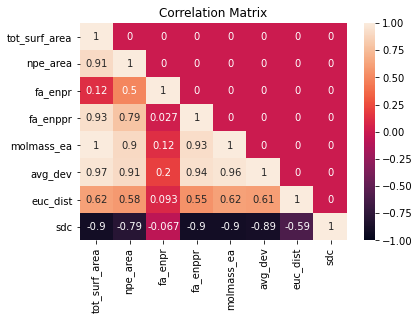

In [49]:
cor = prot[cols].corr()
cor = np.tril(cor)
sns.heatmap(cor,xticklabels=cols,yticklabels=cols,
            vmin=-1,vmax=1,annot=True,square=False)
plt.title("Correlation Matrix")

based on the matrix, there are some correlated variables that needs to be removed

for linear regression, data types have to be numeric

In [50]:
prot.dtypes

tot_surf_area    float64
npe_area         float64
fa_enpr          float64
RMSD             float64
fa_enppr         float64
molmass_ea       float64
avg_dev          float64
euc_dist         float64
sdc              float64
dtype: object

split the data into train/test<br>
trainx/trainy, testx/testy

#spliting and Model Building

In [51]:
trainx,testx,trainy,testy = train_test_split(prot.drop('RMSD',axis=1),
                                             prot['RMSD'],
                                             test_size=0.3 )

In [52]:
print("trainx={},trainy={},testx={},testy={}".format(trainx.shape,trainy.shape,testx.shape,testy.shape))

trainx=(10591, 8),trainy=(10591,),testx=(4539, 8),testy=(4539,)



<br>
train,test = train_test_split(prot,test_size=0.3)<br>
train.shape<br>
test.shape<br>
trainx = train.drop('RMSD',axis=1)<br>
trainy = train['RMSD']<br>
testx = test.drop('RMSD',axis=1)<br>
testy = test['RMSD']<br>


Add a constant term to the trainx and testx<br>
this will ensure that the model summary has the 'intercept' term displayed

In [54]:
trainx = sm.add_constant(trainx)
testx = sm.add_constant(testx)

Linear Regression model building<br>
OLS -> Ordinary Least Square method

In [55]:
m1=sm.OLS(trainy,trainx).fit()

summarise the model

In [56]:
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   RMSD   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     495.4
Date:                Thu, 13 May 2021   Prob (F-statistic):               0.00
Time:                        00:32:20   Log-Likelihood:                -32533.
No. Observations:               10591   AIC:                         6.508e+04
Df Residuals:                   10582   BIC:                         6.515e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             7.2983      1.256      5.809      0.000       4.836       9.761
tot_surf_area     0.0019      0.000      7.918      0.000       0.001       0.002
npe_area          0.0015      0.000      6.454      0.000       0.001       0.002
fa_enpr          18.0231      2.167      8.319      0.000      13.776      22.270
fa_enppr         -0.1020      0.003    -29.553      0.000      -0.109      -0.095
molmass_ea    -5.903e-06   1.48e-06     -3.997      0.000    -8.8e-06   -3.01e-06
avg_dev          -0.0266      0.004     -7.318      0.000      -0.034      -0.020
euc_dist         -0.0002   4.28e-05     -5.393      0.000      -0.000      -0.000
sdc              -0.1354      0.022     -6.276      0.000      -0.178      -0.093
==============================================================================
Omnibus:                      424.685   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              420.210
Skew:                           0.449   Prob(JB):                     5.66e-92
Kurtosis:                       2.618   Cond. No.                     6.76e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.76e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#Validation of Linear regression ,there are assumption 

validation of LR assumptions<br>
i) mean of reisduals = 0

In [57]:
print(m1.resid.mean())

-4.240142474796863e-13



<br>
m1.rsquared<br>
m1.rsquared_adj<br>
dir(m1)<br>


ii) residuals have constant variance (homoscedasticity)<br>
plot the graph<br>
lowess->locally weighted scatterplot smoothing

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

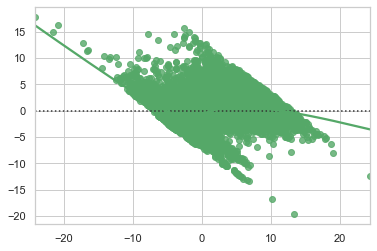

In [58]:
yhat = m1.predict(trainx)
sns.set(style="whitegrid")
sns.residplot(m1.resid,yhat,lowess=True,color='g')

based on the graph, the model is heteroscedastic

bruesch-pagan test against heteroscedasticty

In [59]:
import statsmodels.stats.api as sms

H0: homoscedasticity<br>
H1: heteroscedasticity

return value of breusch pagan test<br>
lagrange_multiplier, pvalue, fscore, fp-value

parameters: [residuals, x-array]

In [60]:
pval = sms.het_breuschpagan(m1.resid,m1.model.exog)[1]

In [61]:
if pval < 0.05:
    print("Reject H0. Model is Heteroscedastic")
else:
    print("FTR H0. Model is Homoscedastic")
    

Reject H0. Model is Heteroscedastic


iii) Reasiduals have a normal distribution

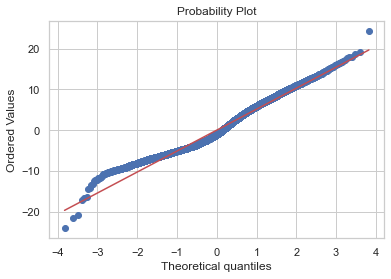

(15130, 9)

In [62]:
stats.probplot(m1.resid, dist='norm', plot=pylab)
pylab.show()
    
# iv) rows > columns
prot.shape    

k-Fold Cross-Validation    

#Cross validation to check the Result difference
#used K fold Cross validation

In [67]:
folds=5    
cv_mse = []

In [69]:
X=trainx.values
Y=trainy.values

In [70]:
kf= KFold(folds)
# kf.get_n_splits(X)

In [71]:
for train_index,test_index in kf.split(X):
    cv_trainx,cv_trainy = X[train_index],Y[train_index]
    cv_testx, cv_testy =  X[test_index],Y[test_index]
    
    # build model on cv_train and predict on cv_test
    m = sm.OLS(cv_trainy,cv_trainx).fit()
    p = m.predict(cv_testx)
    
    # store MSE in the list for each model
    cv_mse.append(np.round(mean_squared_error(cv_testy,p),3))
    
cv_mse

[27.623, 27.769, 26.8, 26.142, 28.355]

mean MSE of k-Fold CV

In [72]:
np.mean(cv_mse) 

27.337799999999998

prediction on the test data

In [75]:
p1 = m1.predict(testx)

MSE of model 1

In [76]:
mse1 = round(mean_squared_error(testy,p1),3)

compare the train and test errors

In [77]:
print("Training MSE = {}, Testing MSE = {}".format(np.mean(cv_mse),mse1))

Training MSE = 27.337799999999998, Testing MSE = 27.355


store the actual and predicted data for comparison

In [78]:
df = pd.DataFrame({'actual':testy,'predicted':round(p1,3)})
df.head(30)

,actual,predicted
9146,19.135,12.068
3171,1.732,7.812
6058,2.601,5.316
6358,2.047,7.919
1726,13.800,11.393
3409,1.296,4.097
7240,0.501,4.572
4805,2.855,9.591
14926,2.093,4.715
3480,13.582,11.951


#Visual representation of Actual and predicted value

plot the actual and predicted values

E:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
E:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='RMSD', ylabel='Density'>

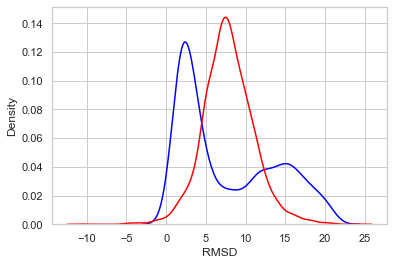

In [79]:
ax1=sns.distplot(testy,hist=False,color='blue',label='Actual')
sns.distplot(p1,hist=False,color='red',label='Predicted',ax=ax1)

other considerations<br>
VIF (Variance Inflation Factor)

In [83]:
vif = pd.DataFrame()

In [84]:
vif["inflation"] = [variance_inflation_factor(trainx.values,i) 
for i in range(trainx.shape[1])]

In [85]:
vif['features'] = list(trainx.columns)

consider VIF > 10 to remove collinearity<br>
sometimes VIF > 6 is also taken as the cutoff

build the next model with the significant features and compare the models for the RMSE

Box Cox transformation

In [86]:
from scipy.stats import boxcox

transform data into BoxCox transformed data

In [87]:
d = np.round(np.random.uniform(10,200,100),2)
bc_values,lamda = boxcox(d)
bc_values
lamda

0.7824603941447035

In [88]:
bc1 = bc_values[0]
bc1
# compare the original and transformed data
print('actual={},BoxCox={}'.format(d[0],round(bc1,2)))

actual=178.71,BoxCox=72.64


transform BoxCox data into its original form

In [89]:
orig = np.exp(np.log(bc1 * lamda+1)/lamda)
orig

178.71000000000024

##############################################################################

#trying Decison tree to improove the result

#2) Decision Tree Regression

In [90]:
from sklearn.tree import DecisionTreeRegressor

In [91]:
m2 = DecisionTreeRegressor(criterion="mse",max_depth=5).fit(trainx,trainy)
p2 = m2.predict(testx)
mse2 = round(mean_squared_error(testy,p2),3)
mse2

27.96

# 3rd model Random Forest

3) Random Forest Regression

In [97]:
from sklearn.ensemble import RandomForestRegressor

without any hyper-parameter tuning. Add, whatever is required

In [99]:
m3 = RandomForestRegressor().fit(trainx,trainy)
p3 = m3.predict(testx)
mse3 = round(mean_squared_error(testy,p3),3)
mse3
mse3

17.778

4) kNN Regression

# 4th M KNN regressor

In [100]:
from sklearn import neighbors,preprocessing

standardize the data

In [101]:
trainx_std = trainx.copy()
testx_std = testx.copy()

In [102]:
minmax=preprocessing.MinMaxScaler()

scale the train data

In [103]:
sc=minmax.fit_transform(trainx_std.iloc[:,:])
trainx_std.iloc[:,:] = sc

scale the test data

In [104]:
sc=minmax.fit_transform(testx_std.iloc[:,:])
testx_std.iloc[:,:] = sc

In [105]:
trainx_std.head(3)

,const,tot_surf_area,npe_area,fa_enpr,fa_enppr,molmass_ea,avg_dev,euc_dist,sdc
3613,0.0,0.171624,0.215294,0.606282,0.331704,0.168738,0.286181,0.051224,0.375594
12164,0.0,0.074326,0.093231,0.455047,0.139744,0.073377,0.101606,0.036727,0.548425
10123,0.0,0.096893,0.073493,0.271454,0.169460,0.097291,0.104939,0.038748,0.519446


for regression, take NN between 3-11 (include even numbers)

In [106]:
nn = range(3,12)
list(nn)

[3, 4, 5, 6, 7, 8, 9, 10, 11]

In [107]:
mse_cv = []

In [108]:
for k in nn:
    m=neighbors.KNeighborsRegressor(n_neighbors=k).fit(trainx_std,trainy)
    err=cross_val_score(m,trainx_std,trainy,cv=5,scoring='neg_mean_squared_error')
    err = np.round(np.mean(err),3)
    mse_cv.append(err)

the MSE scores are all in -ve numbers. Convert to +ve

In [109]:
print(mse_cv)

[-23.428, -22.537, -21.942, -21.848, -21.773, -21.791, -21.789, -21.82, -21.848]


convert all -ve to +ve numbers using lambda()

In [110]:
mse_cv = list(map(lambda x:abs(x),mse_cv))

select the lowest MSE score and its corresponding K-value

In [111]:
bestk = nn[mse_cv.index(min(mse_cv))]

Build the kNN model with the bestK

In [112]:
m4 = neighbors.KNeighborsRegressor(n_neighbors=bestk).fit(trainx_std,trainy)
p4 = m4.predict(testx_std)
mse4 = mean_squared_error(testy,p4)
mse4

48.70854553769823

SVM Regression

#5th model SVM regressor

In [114]:
from sklearn import svm,preprocessing

since data is already scaled, we can directly use the kernels on the scaled data

In [115]:
kernels = ['linear', 'rbf', 'poly', 'sigmoid']
kernels

['linear', 'rbf', 'poly', 'sigmoid']

determine the R-square for each regression model, for each Kernel

In [116]:
for k in kernels:
    m = svm.SVR(kernel = k).fit(trainx_std,trainy)
    rsq = m.score(testx_std,testy)
    print("Kernel = {}, R-Square = {}".format(k, rsq))

Kernel = linear, R-Square = 0.19505317138129818
Kernel = rbf, R-Square = 0.2824517384966292
Kernel = poly, R-Square = -0.26498550583704783
Kernel = sigmoid, R-Square = -79.0210159242371


based on the R-square, it is clear that Sigmoid kernel does not fit the data properly. 

SVM regression

In [117]:
def svmRegression(ker,trainx,trainy,testx,testy,bestc=1,bestg='scale'):
    model=svm.SVR(kernel=ker,C=bestc,gamma=bestg).fit(trainx,trainy)
    pred = model.predict(testx)
    mse = mean_squared_error(testy,pred)
    return(pred, mse)

In [118]:
m_mse=[]; p5=[]

run the regression model for each Kernel

In [119]:
for k in kernels:
    pred,mseval=svmRegression(k,trainx_std,trainy,testx_std,testy)  
    p5.append(pred)
    m_mse.append(round(mseval,3))

create a dataframe to store the MSE's

# Final Result Dataframe

In [120]:
df_mse=pd.DataFrame({'LR':[mse1], 'DT':[mse2],
                      'RF':[mse3], 'kNN':[mse4],
                     'SVM-linear': [m_mse[0]],
                     'SVM-rbf': [m_mse[1]],
                     'SVM-poly': [m_mse[2]],
                     'SVM-sig': [m_mse[3]] 
                     })

In [121]:
print(df_mse)

       LR     DT      RF        kNN  SVM-linear  SVM-rbf  SVM-poly   SVM-sig
0  27.355  27.96  17.778  48.708546      29.746   26.516    46.746  2957.079


transpose the data

In [122]:
df_mse.T
    
# create a dataframe to store the Actual / Predicted values

,0
LR,27.355000
DT,27.960000
RF,17.778000
kNN,48.708546
SVM-linear,29.746000
SVM-rbf,26.516000
SVM-poly,46.746000
SVM-sig,2957.079000


In [123]:
df_vals = pd.DataFrame({'actual':testy,
                        'LR':p1,
                       'DT':p2,
                       'RF':p3,
                       'kNN':p4,
                     'SVM-linear': p5[0],
                     'SVM-rbf':  p5[1],
                     'SVM-poly': p5[2],
                     'SVM-sig': p5[3] } )

In [124]:
df_vals
    
# visualise the Actual vs Predicted Data
def showPlot(act,pred,model):
    ax1=sns.distplot(act,hist=False,color='r',label='Actual')
    sns.distplot(pred,hist=False,color='b',label='Predicted',ax=ax1)
    plt.title('Actual vs Predicted. Model = ' + model)
    

function call to display the chart

E:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
E:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


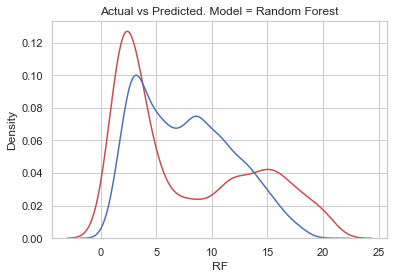

In [125]:
showPlot(df_vals.actual,df_vals['RF'],'Random Forest')  
    